In [10]:
import os
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential, Model, Sequential, load_model, Input
from keras.layers import Dense, Input, Activation, Conv2D, MaxPool2D, Flatten, UpSampling2D, Conv2DTranspose, Reshape, LeakyReLU, Concatenate
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils, plot_model
from keras import backend as K
import matplotlib.pyplot as plt
# matplotlib.use("TkAgg")
%matplotlib inline
import numpy as np
np.random.seed(1)
from PIL import Image
import random
import math
from sklearn.metrics import confusion_matrix

In [11]:
if not os.path.exists('model/'):
    os.makedirs('model/')

In [12]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test)=cifar10.load_data()
digit_size = 32
channels = 3
print('x_train\n', X_train.shape)
print('y_train\n', y_train.shape, y_train[0])
print('x_test\n', X_test.shape)
print('y_test\n', y_test.shape)

x_train
 (50000, 32, 32, 3)
y_train
 (50000, 1) [6]
x_test
 (10000, 32, 32, 3)
y_test
 (10000, 1)


In [13]:
# data pre-processing
X_train = X_train.astype('float32') / 255       # minmax_normalized
X_test = X_test.astype('float32') / 255         # minmax_normalized
X_train = X_train.reshape((-1, digit_size, digit_size, channels))
X_test = X_test.reshape((-1, digit_size, digit_size, channels))
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


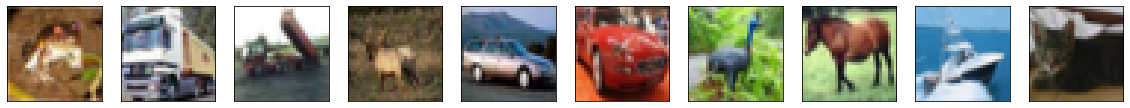

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    if channels > 1:
        plt.imshow(X_train[i].reshape(digit_size, digit_size, channels), cmap='binary')
    else:
        plt.imshow(X_train[i].reshape(digit_size, digit_size))
        plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
input_img = Input(shape=(digit_size, digit_size, channels))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

input_ec = Input(shape=(4, 4, 16)) 
x = Conv2D(16, (3, 3), padding='same')(input_ec)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(channels, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

encoder = Model(inputs=input_img, outputs=encoded)
decoder = Model(input_ec, decoded)

del encoder
encoder = load_model('model/cifar10_encoder.h5')
del decoder
decoder = load_model('model/cifar10_decoder.h5')

ec = encoder(input_img)
dc = decoder(ec)
autoencoder = Model(input_img, dc)

autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

encoder.summary()
decoder.summary()
autoencoder.summary()

/Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
__________

In [7]:
# training
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)

encoder.save('model/cifar10_encoder.h5')
decoder.save('model/cifar10_decoder.h5')

Epoch 1/100
50000/50000 [==============================] - 200s 4ms/step - loss: 0.5830
Epoch 2/100
50000/50000 [==============================] - 197s 4ms/step - loss: 0.5724
Epoch 3/100
50000/50000 [==============================] - 184s 4ms/step - loss: 0.5696
Epoch 4/100
50000/50000 [==============================] - 180s 4ms/step - loss: 0.5680
Epoch 5/100
50000/50000 [==============================] - 181s 4ms/step - loss: 0.5672
Epoch 6/100
50000/50000 [==============================] - 180s 4ms/step - loss: 0.5664
Epoch 7/100
50000/50000 [==============================] - 179s 4ms/step - loss: 0.5659
Epoch 8/100
50000/50000 [==============================] - 178s 4ms/step - loss: 0.5656
Epoch 9/100
50000/50000 [==============================] - 177s 4ms/step - loss: 0.5653
Epoch 10/100
50000/50000 [==============================] - 177s 4ms/step - loss: 0.5650
Epoch 11/100
50000/50000 [==============================] - 176s 4ms/step - loss: 0.5649
Epoch 12/100
50000/50000 [====

(10, 32, 32, 3)


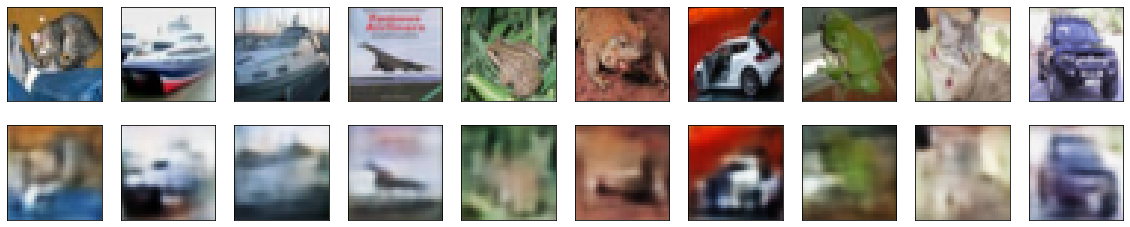

In [16]:
n = 10
decoded_imgs = autoencoder.predict(X_test[:n])
print(decoded_imgs.shape)
  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    if channels > 1:
        plt.imshow(X_test[i].reshape(digit_size, digit_size, channels), cmap='binary')
    else:
        plt.imshow(X_test[i].reshape(digit_size, digit_size))
        plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    if channels > 1:
        plt.imshow(decoded_imgs[i].reshape(digit_size, digit_size, channels), cmap='binary')
    else:
        plt.imshow(decoded_imgs[i].reshape(digit_size, digit_size))
        plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

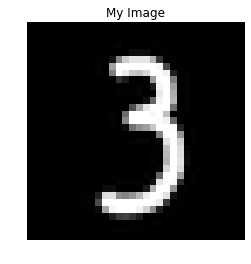

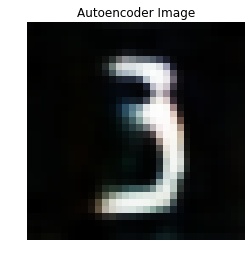

In [17]:
from PIL import Image
im = Image.open("./media/n_3.png")
im = im.resize((digit_size, digit_size), Image.ANTIALIAS)
im = np.array(im) #convert to an array
im2 = im.astype('float32') / 255 # normalise input
# 畫圖
plt.imshow(im2, cmap='gray')
plt.title('My Image')
plt.axis('off')
plt.show()

test_image = np.reshape(im2, [1, digit_size, digit_size, channels]) # reshape it to our input placeholder shape
d_ = autoencoder.predict(test_image)
# 畫圖
if channels > 1:
    plt.imshow(np.reshape(d_, (digit_size, digit_size, channels)))
else:
    plt.imshow(np.reshape(d_, (digit_size, digit_size)))
plt.title('Autoencoder Image')
plt.axis('off')
plt.show()